# Codigo Tarea 1: Astrofisica Galactica.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy 
from scipy import misc
from scipy import ndimage
import glob 
import cv2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
from astropy.visualization import make_lupton_rgb
plt.style.use(astropy_mpl_style)
from astropy.utils.data import get_pkg_data_filename
from photutils.segmentation import detect_sources,detect_threshold,deblend_sources,SourceCatalog
from photutils.isophote import EllipseGeometry,Ellipse
from photutils.aperture import EllipticalAperture

C:\Users\agust\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
datos = fits.open('test3-img.fits')

-------------------------------------------------------------------------------------------------------------------------------

# Parte 1: Catalogo e Imagen RGB

## Catálogo

In [3]:
imagen1 = datos[0].data[0] 
imagen2 = datos[0].data[1]
imagen3 = datos[0].data[2]

In [4]:
FuenteImagen1 = detect_threshold(imagen1,3)
DetecImagen1 = detect_sources(imagen1,FuenteImagen1 , npixels=10)
FuenteImagen2 = detect_threshold(imagen2,3)
DetecImagen2 = detect_sources(imagen2,FuenteImagen2 , npixels=10)
FuenteImagen3 = detect_threshold(imagen3,3)
DetecImagen3 = detect_sources(imagen3,FuenteImagen3 , npixels=10)

In [5]:
ObjetosIm1 = deblend_sources(imagen1,DetecImagen1,npixels=7, nlevels=32, contrast=0.45)
ObjetosIm2 = deblend_sources(imagen2,DetecImagen2,npixels=7, nlevels=32, contrast=0.43)
ObjetosIm3 = deblend_sources(imagen3,DetecImagen3,npixels=7, nlevels=32, contrast=0.33)

Deblending:   0%|          | 0/107 [00:00<?, ?it/s]

Deblending:   0%|          | 0/133 [00:00<?, ?it/s]

Deblending:   0%|          | 0/119 [00:00<?, ?it/s]

In [6]:
CatalogoImagen1 = SourceCatalog(imagen1,ObjetosIm1)
tablaIm1 = CatalogoImagen1.to_table()
tablaIm1['xcentroid'].info.format = '.2f'  
tablaIm1['ycentroid'].info.format = '.2f'
tablaIm1['kron_flux'].info.format = '.2f'

CatalogoImagen2 = SourceCatalog(imagen2,ObjetosIm2)
tablaIm2 = CatalogoImagen2.to_table()
tablaIm2['xcentroid'].info.format = '.2f'  
tablaIm2['ycentroid'].info.format = '.2f'
tablaIm2['kron_flux'].info.format = '.2f'

CatalogoImagen3 = SourceCatalog(imagen3,ObjetosIm3)
tablaIm3 = CatalogoImagen3.to_table()
tablaIm3['xcentroid'].info.format = '.2f'  
tablaIm3['ycentroid'].info.format = '.2f'
tablaIm3['kron_flux'].info.format = '.2f'

In [7]:
print(tablaIm1)

label xcentroid ycentroid ... segment_fluxerr kron_flux kron_fluxerr
                          ...                                       
----- --------- --------- ... --------------- --------- ------------
    1     59.83      5.67 ...             nan    467.18          nan
    2    565.98      7.74 ...             nan      1.10          nan
    3    924.97     18.15 ...             nan     13.26          nan
    4     27.47     25.32 ...             nan     40.49          nan
    5    812.64     44.05 ...             nan     58.64          nan
    6    147.47     39.12 ...             nan      1.41          nan
    7    701.17     40.34 ...             nan      2.75          nan
    8    916.29     45.80 ...             nan     16.18          nan
    9    352.27     41.92 ...             nan      0.67          nan
   10    636.32    118.40 ...             nan    724.25          nan
  ...       ...       ... ...             ...       ...          ...
  120    284.06    956.96 ...     

In [8]:
print(tablaIm2)

label xcentroid ycentroid ... segment_fluxerr kron_flux kron_fluxerr
                          ...                                       
----- --------- --------- ... --------------- --------- ------------
    1     59.91      5.53 ...             nan    859.80          nan
    2    628.75      7.00 ...             nan      2.39          nan
    3    565.53      8.07 ...             nan      2.01          nan
    4    924.82     17.99 ...             nan     30.43          nan
    5     27.61     25.45 ...             nan     67.02          nan
    6    474.25     29.90 ...             nan      1.57          nan
    7    812.73     44.06 ...             nan    135.61          nan
    8    147.49     39.26 ...             nan      3.63          nan
    9    700.47     40.94 ...             nan      8.16          nan
   10    352.44     41.55 ...             nan      1.57          nan
  ...       ...       ... ...             ...       ...          ...
  144    698.13    964.25 ...     

In [9]:
print(tablaIm3)

label xcentroid ycentroid ... segment_fluxerr kron_flux kron_fluxerr
                          ...                                       
----- --------- --------- ... --------------- --------- ------------
    1     59.93      5.64 ...             nan   1118.66          nan
    2    566.70      7.55 ...             nan      5.32          nan
    3    924.42     17.78 ...             nan     54.14          nan
    4     27.56     25.34 ...             nan     91.70          nan
    5    813.12     44.08 ...             nan    258.45          nan
    6    147.39     39.11 ...             nan      5.64          nan
    7    636.57    118.12 ...             nan   3186.66          nan
    8    352.54     41.70 ...             nan      2.01          nan
    9    916.06     46.02 ...             nan     34.46          nan
   10    705.15     51.07 ...             nan     26.65          nan
  ...       ...       ... ...             ...       ...          ...
  131    890.60    983.39 ...     

-------------------------------------------------------------------------------------------------------------------------------

## Imagen a Color y fuentes detectadas

Text(0.5, 1.0, 'Imagen filtro g')

Text(0.5, 1.0, 'Imagen filtro r')

Text(0.5, 1.0, 'Imagen filtro z')

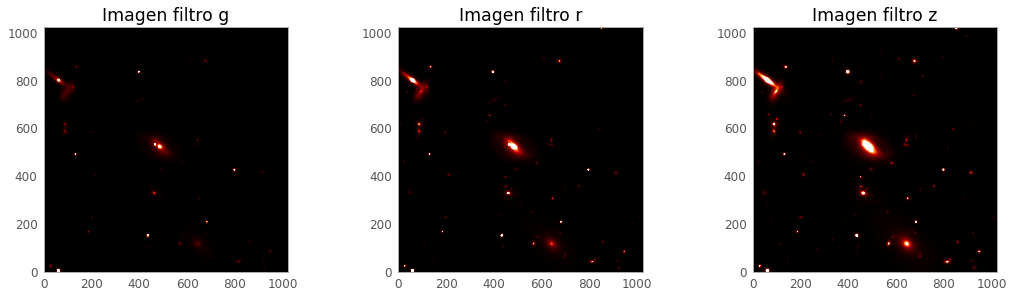

In [10]:
fig,ax=plt.subplots(1,3,figsize=(18,4.5))

ax[0].imshow(imagen1, origin = 'lower', vmin = 0, vmax = 1)
ax[0].set_title('Imagen filtro g')
ax[0].grid(None)
ax[1].imshow(imagen2, origin = 'lower', vmin= 0, vmax =1)
ax[1].set_title('Imagen filtro r')
ax[1].grid(None)
ax[2].imshow(imagen3, origin = 'lower', vmin= 0, vmax =1)
ax[2].set_title('Imagen filtro z')
ax[2].grid(None)

Text(0.5, 1.0, 'Imagen RGB')

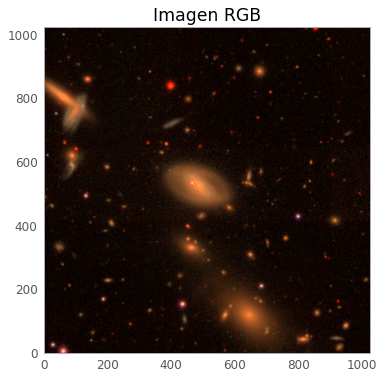

In [11]:
ImagenColor = rgb_default = make_lupton_rgb(imagen3, imagen2, imagen1, Q=10, stretch=0.1)
plt.imshow(ImagenColor, origin = 'lower')
plt.title('Imagen RGB')
plt.grid(None)

Text(0.5, 1.0, 'Orientaciones y Tamaños por filtro')

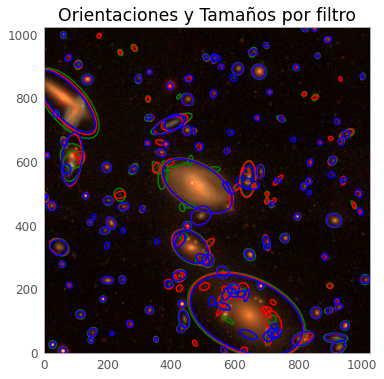

In [12]:
ImagenColor = make_lupton_rgb(imagen3, imagen2, imagen1, minimum=0, Q=10, stretch=0.1)

plt.imshow(ImagenColor,origin='lower', vmin = 0)

#Colocamos cada apertura encontrada en los catalogos.
CatalogoImagen1.plot_kron_apertures(color='green', lw=1.5)
CatalogoImagen2.plot_kron_apertures(color='red', lw=1.5)
CatalogoImagen3.plot_kron_apertures(color= 'blue', lw=1.5)
plt.title('Orientaciones y Tamaños por filtro')
plt.grid(None)

-------------------------------------------------------------------------------------------------------------------------------

# Parte: 2 Isofotas y Ajustes

In [19]:
def Isofotas(Objeto,Formas): 
    "Funcion para colocar las isofotas ajustadas en la imagen."
    return Ellipse(Objeto,Formas).fit_image()
def Aperturas(g,y):
    "Funcion para tener las diferentes isofotas en el ajuste."
    return EllipticalAperture((g.x0[y], g.y0[y]), g.sma[y], g.sma[y] * (1-g.eps[y]), g.pa[y])

## Objeto 1

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Isofota Objeto 1')

(<matplotlib.patches.Ellipse at 0x2032c8352b0>,)

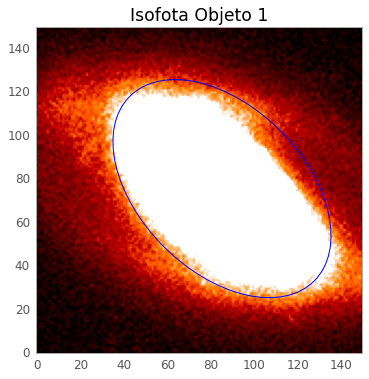

In [14]:
Objeto1 = imagen1[(500-50):(500+100),(450-50):(500+50)] #Zoom.

Elipse = EllipseGeometry(x0=85, y0=75, sma=60, eps=0.37, #Valores de la elipse.
                           pa=135.0 * np.pi / 180.0)

apertura = EllipticalAperture((Elipse.x0, Elipse.y0), Elipse.sma,
                          Elipse.sma * (1 - Elipse.eps),
                          Elipse.pa) #La elipse que colocamos.
plt.figure(figsize=(6,6))
plt.imshow(Objeto1, origin='lower',vmin= 0, vmax=np.mean(imagen1)+np.std(imagen1))
plt.title('Isofota Objeto 1')

apertura.plot(color="blue")
plt.grid(None)

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Ajuste Isofota Objeto 1')

(<matplotlib.patches.Ellipse at 0x2032dac2670>,)

(<matplotlib.patches.Ellipse at 0x2032dad5eb0>,)

(<matplotlib.patches.Ellipse at 0x2032dae9160>,)

(<matplotlib.patches.Ellipse at 0x2032dae93d0>,)

(<matplotlib.patches.Ellipse at 0x2032dae9640>,)

(<matplotlib.patches.Ellipse at 0x2032dae9910>,)

(<matplotlib.patches.Ellipse at 0x2032dae9b20>,)

(<matplotlib.patches.Ellipse at 0x2032dae9d90>,)

(<matplotlib.patches.Ellipse at 0x2032dae9f70>,)

(<matplotlib.patches.Ellipse at 0x2032daed280>,)

(<matplotlib.patches.Ellipse at 0x2032daed2b0>,)

(<matplotlib.patches.Ellipse at 0x2032daed7f0>,)

(<matplotlib.patches.Ellipse at 0x2032daeda00>,)

(<matplotlib.patches.Ellipse at 0x2032daedbe0>,)

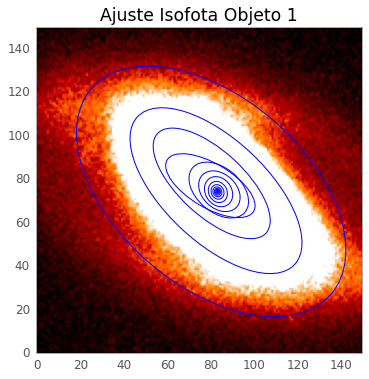

In [17]:
Isofota_Imagen_1 = Isofotas(Objeto1,Elipse) #Colocamos la isofota.
plt.figure(figsize=(6,6))
plt.imshow(Objeto1, origin='lower',vmin= 0, vmax=np.mean(imagen1)+np.std(imagen1))
plt.title('Ajuste Isofota Objeto 1')
plt.grid(None)

for i in range(1,57,4): #Ciclo para colocar las siguientes isofotas.
                        #Tiene que coincidir con las dimensiones de la imagen
                        #Vamos de a 4 isofotas colocandolas.
    Aperturas(Isofota_Imagen_1,i).plot(color='blue')
    
#Este proceso lo hacemos para cada objeto. 

-------------------------------------------------------------------------------------------------------------------------------

## Objeto 2

<Figure size 504x504 with 0 Axes>

Text(0.5, 1.0, 'Isofota Objeto 2')

(<matplotlib.patches.Ellipse at 0x29384608880>,)

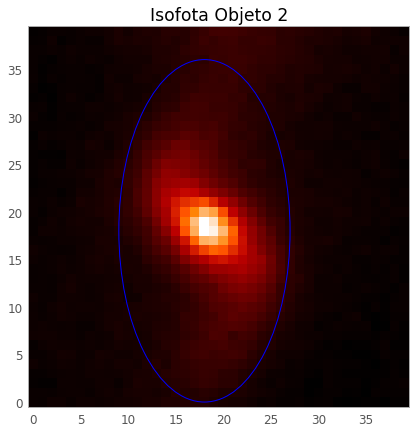

In [16]:
Objeto2 = imagen1[(590-20):(590+20),(89-20):(89+20)]

Elipse2 = EllipseGeometry(x0=18, y0=18, sma=18, eps=0.5,
                           pa=90.0 * np.pi / 180.0)

apertura2 = EllipticalAperture((Elipse2.x0, Elipse2.y0), Elipse2.sma,
                          Elipse2.sma * (1 - Elipse2.eps),
                          Elipse2.pa)
plt.figure(figsize=(7,7))
plt.imshow(Objeto2, origin='lower')
plt.title('Isofota Objeto 2')
plt.grid(None)

apertura2.plot(color="blue")

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Ajuste Isofota Objeto 2')

(<matplotlib.patches.Ellipse at 0x2938565e1c0>,)

(<matplotlib.patches.Ellipse at 0x293856428b0>,)

(<matplotlib.patches.Ellipse at 0x2938565e640>,)

(<matplotlib.patches.Ellipse at 0x2938565e610>,)

(<matplotlib.patches.Ellipse at 0x2938563d430>,)

(<matplotlib.patches.Ellipse at 0x2938565ebb0>,)

(<matplotlib.patches.Ellipse at 0x2938565eb80>,)

(<matplotlib.patches.Ellipse at 0x29385668190>,)

(<matplotlib.patches.Ellipse at 0x29385668160>,)

(<matplotlib.patches.Ellipse at 0x2938563d400>,)

(<matplotlib.patches.Ellipse at 0x29385668880>,)

(<matplotlib.patches.Ellipse at 0x29385668b20>,)

(<matplotlib.patches.Ellipse at 0x29385668b80>,)

(<matplotlib.patches.Ellipse at 0x29385668fd0>,)

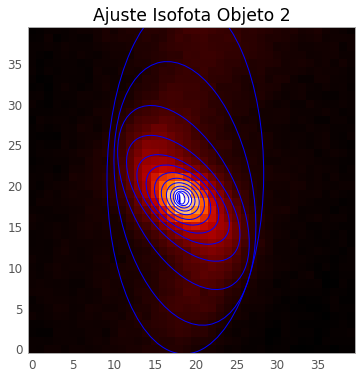

In [17]:
Isofota_Imagen_2 = Isofotas(Objeto2,Elipse2)
plt.figure(figsize=(6,6))
plt.imshow(Objeto2, origin='lower')
plt.title('Ajuste Isofota Objeto 2')
plt.grid(None)

for i in range(1,43,3):
    Aperturas(Isofota_Imagen_2,i).plot(color='blue')

-------------------------------------------------------------------------------------------------------------------------------

## Objeto 3

<Figure size 504x504 with 0 Axes>

Text(0.5, 1.0, 'Isofota Objeto 3')

(<matplotlib.patches.Ellipse at 0x2938569b610>,)

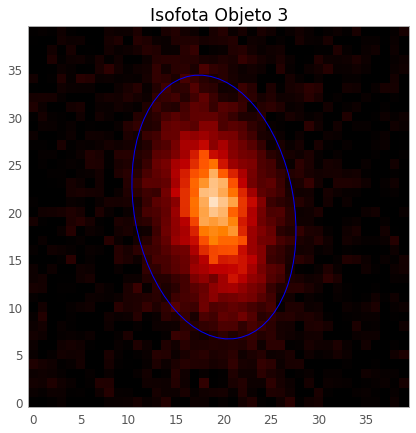

In [18]:
Objeto3 = imagen1[(105-20):(105+20),(441-20):(441+20)]

Elipse3 = EllipseGeometry(x0=19, y0=20.5, sma=14, eps=0.4,
                           pa=100.0 * np.pi / 180.0)

aper3 = EllipticalAperture((Elipse3.x0, Elipse3.y0), Elipse3.sma,
                          Elipse3.sma * (1-Elipse3.eps),
                          Elipse3.pa)
plt.figure(figsize=(7,7))
plt.imshow(Objeto3, origin='lower',vmin= 0, vmax=np.mean(imagen1)+np.std(imagen1))
plt.title('Isofota Objeto 3')
plt.grid(None)

aper3.plot(color="blue")

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Ajuste Isofota Objeto 3')

(<matplotlib.patches.Ellipse at 0x293857165b0>,)

(<matplotlib.patches.Ellipse at 0x29385716730>,)

(<matplotlib.patches.Ellipse at 0x293856ff040>,)

(<matplotlib.patches.Ellipse at 0x293856f8a00>,)

(<matplotlib.patches.Ellipse at 0x29385716d00>,)

(<matplotlib.patches.Ellipse at 0x2938571d070>,)

(<matplotlib.patches.Ellipse at 0x2938571d100>,)

(<matplotlib.patches.Ellipse at 0x2938571d4c0>,)

(<matplotlib.patches.Ellipse at 0x2938571d730>,)

(<matplotlib.patches.Ellipse at 0x2938571d9d0>,)

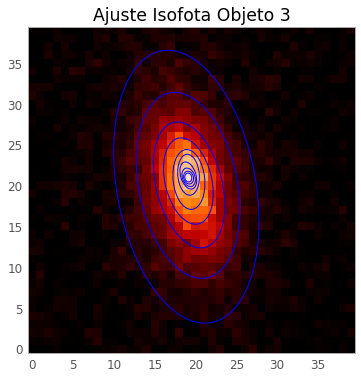

In [19]:
Isofota_Imagen_3 = Isofotas(Objeto3,Elipse3)
plt.figure(figsize=(6,6))
plt.imshow(Objeto3, origin='lower',vmin= 0, vmax=np.mean(imagen1)+np.std(imagen1))
plt.title('Ajuste Isofota Objeto 3')
plt.grid(None)

for i in range(1,41,4):
    Aperturas(Isofota_Imagen_3,i).plot(color='blue')

-------------------------------------------------------------------------------------------------------------------------------

## Objeto 4

<Figure size 504x504 with 0 Axes>

Text(0.5, 1.0, 'Isofota Objeto 4')

(<matplotlib.patches.Ellipse at 0x29385752850>,)

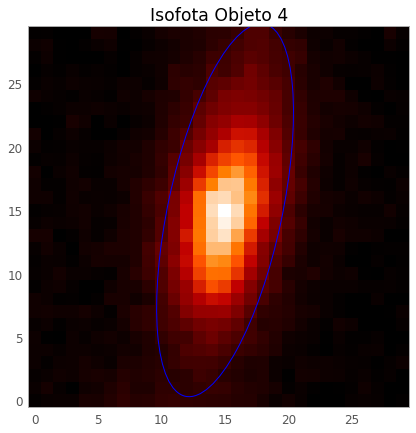

In [20]:
Objeto4 = imagen1[(552-15):(552+15),(641-15):(641+15)]

Elipse4 = EllipseGeometry(x0=15, y0=15, sma=15, eps=0.7,
                           pa=78 * np.pi / 180.0)

aper4 = EllipticalAperture((Elipse4.x0, Elipse4.y0), Elipse4.sma,
                          Elipse4.sma * (1 - Elipse4.eps),
                          Elipse4.pa)
plt.figure(figsize=(7,7))
plt.imshow(Objeto4, origin='lower',vmin= 0)
plt.title('Isofota Objeto 4')
plt.grid(None)

aper4.plot(color="blue")

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Ajuste Isofota Objeto 4')

(<matplotlib.patches.Ellipse at 0x293857c14f0>,)

(<matplotlib.patches.Ellipse at 0x2938579b820>,)

(<matplotlib.patches.Ellipse at 0x293857c1850>,)

(<matplotlib.patches.Ellipse at 0x2938579efa0>,)

(<matplotlib.patches.Ellipse at 0x293857c1d00>,)

(<matplotlib.patches.Ellipse at 0x293857c1bb0>,)

(<matplotlib.patches.Ellipse at 0x293857ca220>,)

(<matplotlib.patches.Ellipse at 0x293857ca160>,)

(<matplotlib.patches.Ellipse at 0x293857ca6a0>,)

(<matplotlib.patches.Ellipse at 0x293857ca970>,)

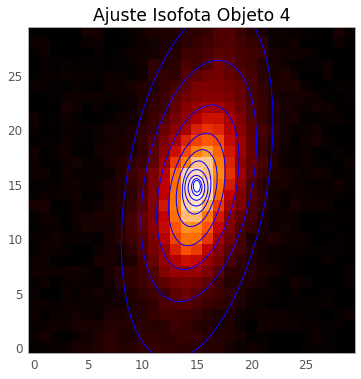

In [21]:
Isofota_Imagen_4 = Isofotas(Objeto4,Elipse4)
plt.figure(figsize=(6,6))
plt.imshow(Objeto4, origin='lower',vmin= 0)
plt.title('Ajuste Isofota Objeto 4')
plt.grid(None)

for i in range(1,41,4):
    Aperturas(Isofota_Imagen_4,i).plot(color='blue')

-------------------------------------------------------------------------------------------------------------------------------

## Objeto 5

<Figure size 504x504 with 0 Axes>

Text(0.5, 1.0, 'Isofota Objeto 5')

(<matplotlib.patches.Ellipse at 0x293857fb400>,)

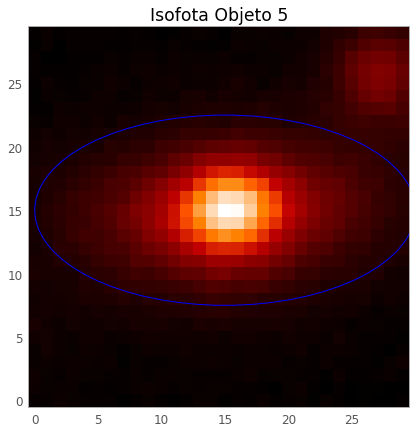

In [22]:
Objeto5 = imagen1[(43-15):(43+15),(811-15):(811+15)]

Elipse5 = EllipseGeometry(x0=15, y0=15, sma=15, eps=0.5,
                           pa=0 * np.pi / 180.0)

aper5 = EllipticalAperture((Elipse5.x0, Elipse5.y0), Elipse5.sma,
                          Elipse5.sma * (1 - Elipse5.eps),
                          Elipse5.pa)
plt.figure(figsize=(7,7))
plt.imshow(Objeto5, origin='lower',vmin= 0)
plt.title('Isofota Objeto 5')
plt.grid(None)

aper5.plot(color="blue")

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Ajuste Isofota Objeto 5')

(<matplotlib.patches.Ellipse at 0x293858402e0>,)

(<matplotlib.patches.Ellipse at 0x2938586a160>,)

(<matplotlib.patches.Ellipse at 0x2938586a0d0>,)

(<matplotlib.patches.Ellipse at 0x2938586a5b0>,)

(<matplotlib.patches.Ellipse at 0x2938586a580>,)

(<matplotlib.patches.Ellipse at 0x2938586ab80>,)

(<matplotlib.patches.Ellipse at 0x2938586ad00>,)

(<matplotlib.patches.Ellipse at 0x29385874070>,)

(<matplotlib.patches.Ellipse at 0x2938586abb0>,)

(<matplotlib.patches.Ellipse at 0x293858744c0>,)

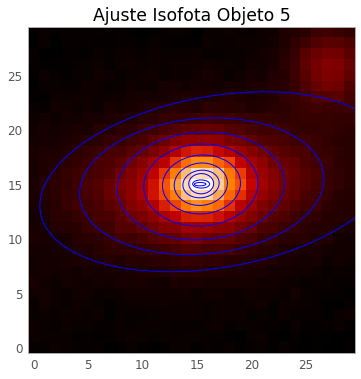

In [23]:
Isofota_Imagen_5 = Isofotas(Objeto5,Elipse5)
plt.figure(figsize=(6,6))
plt.imshow(Objeto5, origin='lower',vmin= 0)
plt.title('Ajuste Isofota Objeto 5')
plt.grid(None)

for i in range(1,41,4):
    Aperturas(Isofota_Imagen_5,i).plot(color='blue')

-------------------------------------------------------------------------------------------------------------------------------

## Objeto 6

<Figure size 504x504 with 0 Axes>

Text(0.5, 1.0, 'Isofota Objeto 6')

(<matplotlib.patches.Ellipse at 0x29385745550>,)

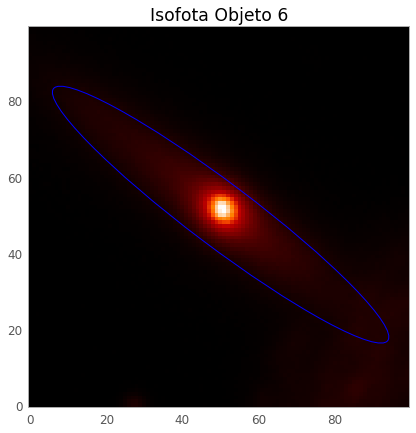

In [24]:
Objeto6 = imagen1[(800-50):(800+50),(60-50):(60+50)]

Elipse6 = EllipseGeometry(x0=50, y0=50, sma=55, eps=0.85,
                           pa=143.0 * np.pi / 180.0)

aper6 = EllipticalAperture((Elipse6.x0, Elipse6.y0), Elipse6.sma,
                          Elipse6.sma * (1 - Elipse6.eps),
                          Elipse6.pa)
plt.figure(figsize=(7,7))
plt.imshow(Objeto6, origin='lower',vmin= 0)
plt.title('Isofota Objeto 6')
plt.grid(None)

aper6.plot(color="blue")

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Ajuste Isofota Objeto 6')

(<matplotlib.patches.Ellipse at 0x293858e8eb0>,)

(<matplotlib.patches.Ellipse at 0x29380b6b820>,)

(<matplotlib.patches.Ellipse at 0x29380b6bc40>,)

(<matplotlib.patches.Ellipse at 0x29380e4bca0>,)

(<matplotlib.patches.Ellipse at 0x29380e5d070>,)

(<matplotlib.patches.Ellipse at 0x29380e5d310>,)

(<matplotlib.patches.Ellipse at 0x29381568640>,)

(<matplotlib.patches.Ellipse at 0x29381568be0>,)

(<matplotlib.patches.Ellipse at 0x29381568910>,)

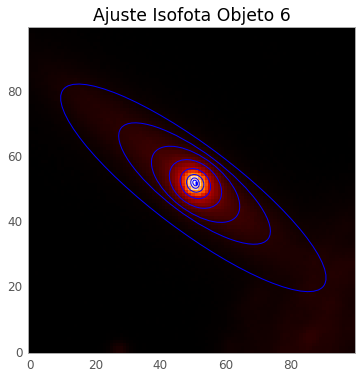

In [25]:
Isofota_Imagen_6 = Isofotas(Objeto6,Elipse6)
plt.figure(figsize=(6,6))
plt.imshow(Objeto6, origin='lower',vmin= 0)
plt.title('Ajuste Isofota Objeto 6')
plt.grid(None)

for i in range(1,51,6):
    Aperturas(Isofota_Imagen_6,i).plot(color='blue')

-------------------------------------------------------------------------------------------------------------------------------

## Objeto 7

<Figure size 504x504 with 0 Axes>

Text(0.5, 1.0, 'Isofota Objeto 7')

(<matplotlib.patches.Ellipse at 0x2938171c5b0>,)

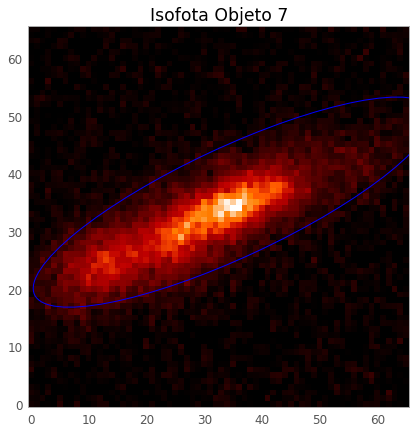

In [26]:
Objeto7 = imagen1[(720-33):(720+33),(405-33):(405+33)]

Elipse7 = EllipseGeometry(x0=35, y0=35, sma=38, eps=0.75,
                           pa=25.0 * np.pi / 180.0)

aper7 = EllipticalAperture((Elipse7.x0, Elipse7.y0), Elipse7.sma,
                          Elipse7.sma * (1 - Elipse7.eps),
                          Elipse7.pa)
plt.figure(figsize=(7,7))
plt.imshow(Objeto7, origin='lower',vmin= 0)
plt.title('Isofota Objeto 7')
plt.grid(None)

aper7.plot(color="blue")

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Ajuste Isofota Objeto 7')

(<matplotlib.patches.Ellipse at 0x293818b16d0>,)

(<matplotlib.patches.Ellipse at 0x29380c2b370>,)

(<matplotlib.patches.Ellipse at 0x29380c10d90>,)

(<matplotlib.patches.Ellipse at 0x29380c2ba00>,)

(<matplotlib.patches.Ellipse at 0x29380c2bf40>,)

(<matplotlib.patches.Ellipse at 0x29380c2beb0>,)

(<matplotlib.patches.Ellipse at 0x29380c2b8b0>,)

(<matplotlib.patches.Ellipse at 0x29380c888b0>,)

(<matplotlib.patches.Ellipse at 0x29380c885b0>,)

(<matplotlib.patches.Ellipse at 0x29380c88b50>,)

(<matplotlib.patches.Ellipse at 0x29380ca22e0>,)

(<matplotlib.patches.Ellipse at 0x29380ca25e0>,)

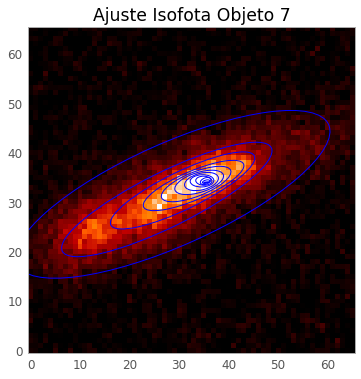

In [27]:
Isofota_Imagen_7 = Isofotas(Objeto7,Elipse7)
plt.figure(figsize=(6,6))
plt.imshow(Objeto7, origin='lower',vmin= 0, vmax=np.mean(imagen1)+np.std(imagen1))
plt.title('Ajuste Isofota Objeto 7')
plt.grid(None)

for i in range(1,49,4):
    Aperturas(Isofota_Imagen_7,i).plot(color='blue')

-------------------------------------------------------------------------------------------------------------------------------

## Objeto 8

<Figure size 504x504 with 0 Axes>

Text(0.5, 1.0, 'Isofota Objeto 8')

(<matplotlib.patches.Ellipse at 0x29381612130>,)

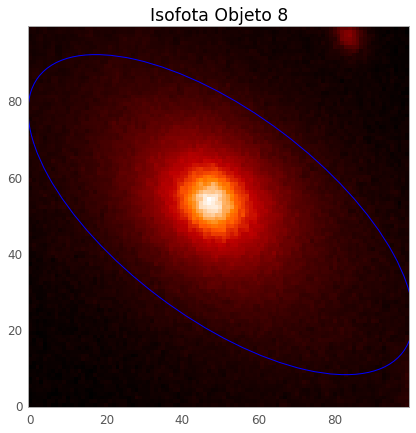

In [28]:
Objeto8 = imagen1[(115-50):(115+50),(644-50):(644+50)]

Elipse8 = EllipseGeometry(x0=50, y0=50, sma=60, eps=0.55,
                           pa=143.0 * np.pi / 180.0)

aper8 = EllipticalAperture((Elipse8.x0, Elipse8.y0), Elipse8.sma,
                          Elipse8.sma * (1 - Elipse8.eps),
                          Elipse8.pa)
plt.figure(figsize=(7,7))
plt.imshow(Objeto8, origin='lower',vmin= 0)#, vmax=np.mean(imagen1)+np.std(imagen1))
plt.title('Isofota Objeto 8')
plt.grid(None)

aper8.plot(color="blue")

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Ajuste Isofota Objeto 8')

(<matplotlib.patches.Ellipse at 0x2938138a640>,)

(<matplotlib.patches.Ellipse at 0x293813aaf70>,)

(<matplotlib.patches.Ellipse at 0x2938138ad90>,)

(<matplotlib.patches.Ellipse at 0x2938138a970>,)

(<matplotlib.patches.Ellipse at 0x293813cb370>,)

(<matplotlib.patches.Ellipse at 0x293813cb970>,)

(<matplotlib.patches.Ellipse at 0x293813cb9d0>,)

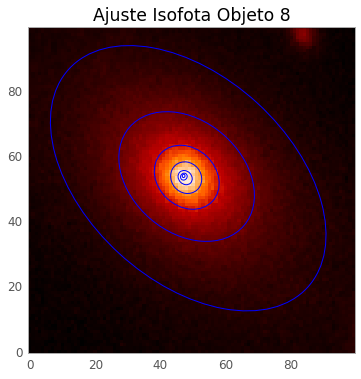

In [29]:
Isofota_Imagen_8 = Isofotas(Objeto8,Elipse8)
plt.figure(figsize=(6,6))
plt.imshow(Objeto8, origin='lower',vmin= 0)
plt.title('Ajuste Isofota Objeto 8')
plt.grid(None)

for i in range(1,51,8):
    Aperturas(Isofota_Imagen_8,i).plot(color='blue')

-------------------------------------------------------------------------------------------------------------------------------

## Objeto 9

<Figure size 504x504 with 0 Axes>

Text(0.5, 1.0, 'Isofota Objeto 9')

(<matplotlib.patches.Ellipse at 0x29380d1d8e0>,)

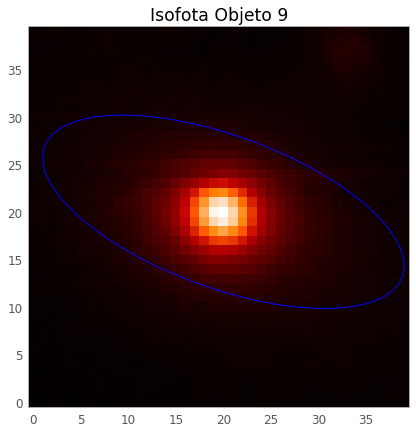

In [30]:
Objeto9 = imagen1[(330-20):(330+20),(461-20):(461+20)]

Elipse9 = EllipseGeometry(x0=20, y0=20, sma=20, eps=0.6,
                           pa=160 * np.pi / 180.0)

aper9 = EllipticalAperture((Elipse9.x0, Elipse9.y0), Elipse9.sma,
                          Elipse9.sma * (1 - Elipse9.eps),
                          Elipse9.pa)
plt.figure(figsize=(7,7))
plt.imshow(Objeto9, origin='lower',vmin= 0)
plt.title('Isofota Objeto 9')
plt.grid(None)

aper9.plot(color="blue")

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Ajuste Isofota Objeto 9')

(<matplotlib.patches.Ellipse at 0x293858ec250>,)

(<matplotlib.patches.Ellipse at 0x2938158cfd0>,)

(<matplotlib.patches.Ellipse at 0x2938158cd60>,)

(<matplotlib.patches.Ellipse at 0x29381640b80>,)

(<matplotlib.patches.Ellipse at 0x2938153f7c0>,)

(<matplotlib.patches.Ellipse at 0x2938153fb20>,)

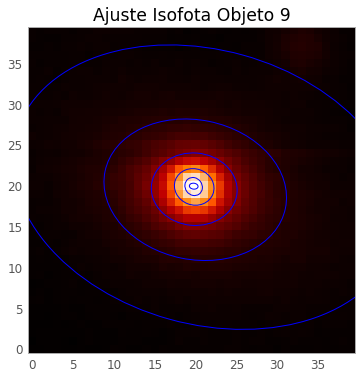

In [31]:
Isofota_Imagen_9 = Isofotas(Objeto9,Elipse9)
plt.figure(figsize=(6,6))
plt.imshow(Objeto9, origin='lower',vmin= 0)
plt.title('Ajuste Isofota Objeto 9')
plt.grid(None)

for i in range(1,42,8):
    Aperturas(Isofota_Imagen_9,i).plot(color='blue')